In [1]:
pip install pandas seaborn matplotlib plotly gapminder pyarrow scipy prince tabulate wordcloud matplotlib-venn anytree joypy

In [2]:
import numpy as np
import pandas as pd
import csv
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from prince import PCA
from tabulate import tabulate
from matplotlib.patches import Wedge
from matplotlib.transforms import Affine2D
import networkx as nx
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from matplotlib_venn import venn3
from IPython.display import display, HTML
from anytree import Node, RenderTree
from joypy import joyplot
import matplotlib.cm as cm

# **1numeric-story**

In [3]:
url = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/1_OneNum.csv"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text))

print(data.head(6))

   price
0   75.0
1  104.0
2  369.0
3  300.0
4   92.0
5   64.0


In [4]:
filtered_data = data[data['price'] < 300]

Plotted a histogram and a density plot

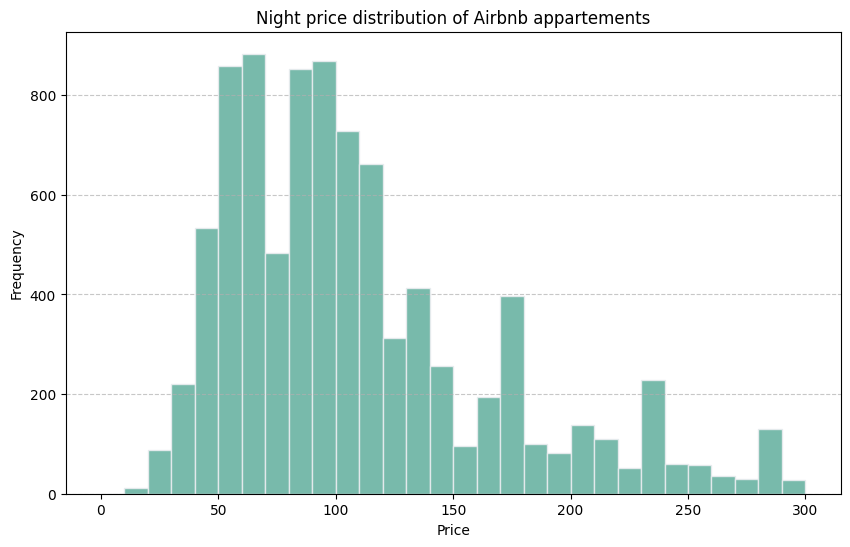

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price'], bins=range(0, 310, 10), color="#69b3a2", edgecolor="#e9ecef", alpha=0.9)
plt.title("Night price distribution of Airbnb appartements")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-6-268c568bbc78>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=10`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(filtered_data['price'], fill=True, color="#69b3a2", edgecolor="#e9ecef", alpha=0.7, bw=10)


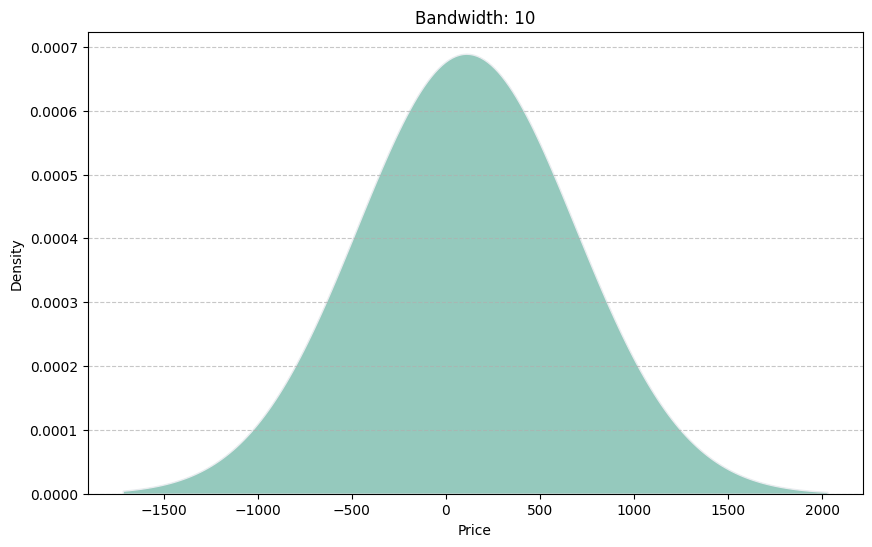

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data['price'], fill=True, color="#69b3a2", edgecolor="#e9ecef", alpha=0.7, bw=10)
plt.title("Bandwidth: 10")
plt.xlabel("Price")
plt.ylabel("Density")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **2numeric -> not ordered -> few points**

In [7]:
url = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/2_TwoNum.csv"
data = pd.read_csv(url)[['GrLivArea', 'SalePrice']]

print(data.head(6).to_markdown(index=False))

|   GrLivArea |   SalePrice |
|------------:|------------:|
|        1710 |      208500 |
|        1262 |      181500 |
|        1786 |      223500 |
|        1717 |      140000 |
|        2198 |      250000 |
|        1362 |      143000 |


Plotted two histograms and a scatter plot

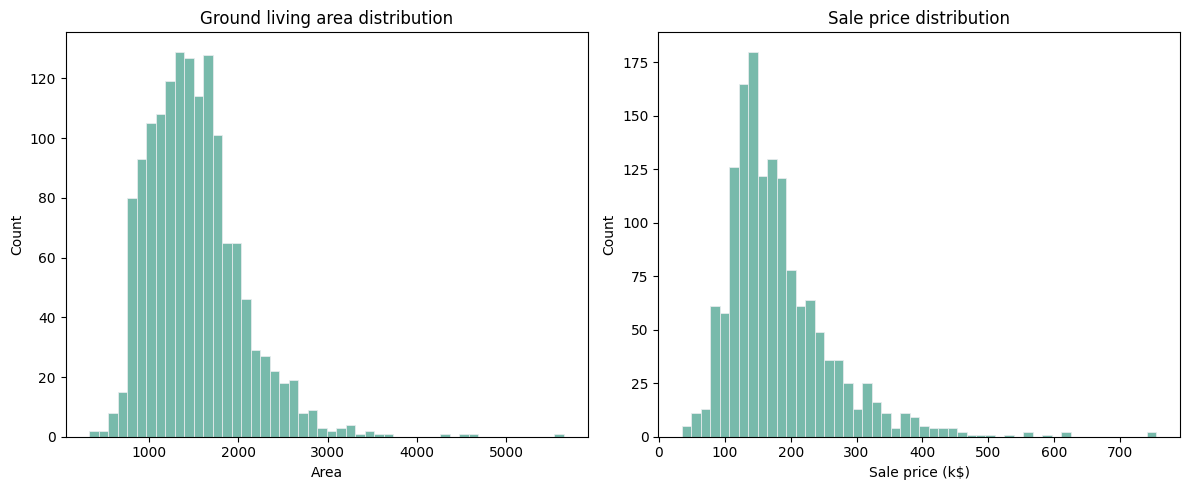

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['GrLivArea'], bins=50, color="#69b3a2", edgecolor="#e9ecef", alpha=0.9)
plt.title("Ground living area distribution")
plt.xlabel('Area')

plt.subplot(1, 2, 2)
sns.histplot(data['SalePrice'] / 1000, bins=50, color="#69b3a2", edgecolor="#e9ecef", alpha=0.9)
plt.title("Sale price distribution")
plt.xlabel('Sale price (k$)')

plt.tight_layout()
plt.show()

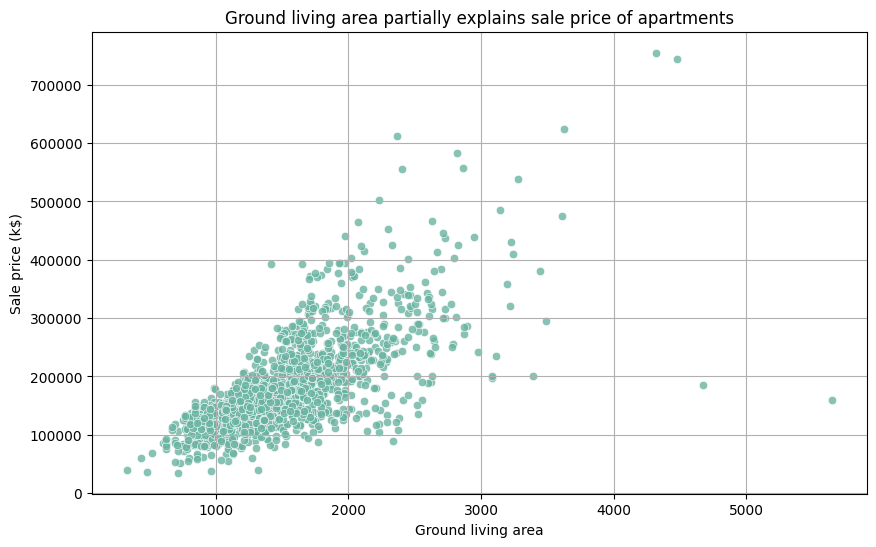

In [9]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, color="#69b3a2", alpha=0.8)
plt.title("Ground living area partially explains sale price of apartments")
plt.xlabel('Ground living area')
plt.ylabel('Sale price (k$)')

plt.grid(True)
plt.show()

# **2numeric - not ordered - many points - story**

In [10]:
url = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/2_TwoNum.csv"
data = pd.read_csv(url)[['GrLivArea', 'SalePrice']]

print(data.head(6).to_markdown(index=False))

|   GrLivArea |   SalePrice |
|------------:|------------:|
|        1710 |      208500 |
|        1262 |      181500 |
|        1786 |      223500 |
|        1717 |      140000 |
|        2198 |      250000 |
|        1362 |      143000 |


Plotted a box plot, two histograms, a scatter plot, a 2d density plot, a hexbin

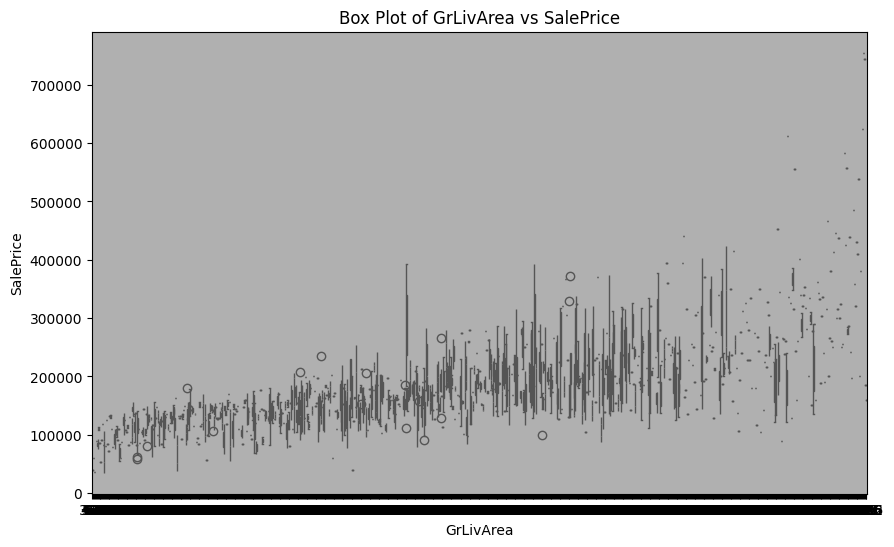

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GrLivArea', y='SalePrice', data=data, color='#69b3a2')
plt.title("Box Plot of GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))

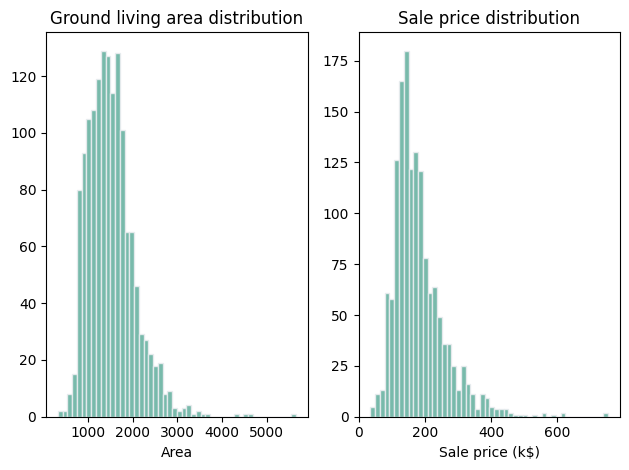

In [12]:
plt.subplot(1, 2, 1)
plt.hist(data['GrLivArea'], bins=50, color="#69b3a2", edgecolor="#e9ecef", alpha=0.9)
plt.title("Ground living area distribution")
plt.xlabel('Area')

plt.subplot(1, 2, 2)
plt.hist(data['SalePrice'] / 1000, bins=50, color="#69b3a2", edgecolor="#e9ecef", alpha=0.9)
plt.title("Sale price distribution")
plt.xlabel('Sale price (k$)')

plt.tight_layout()
plt.show()

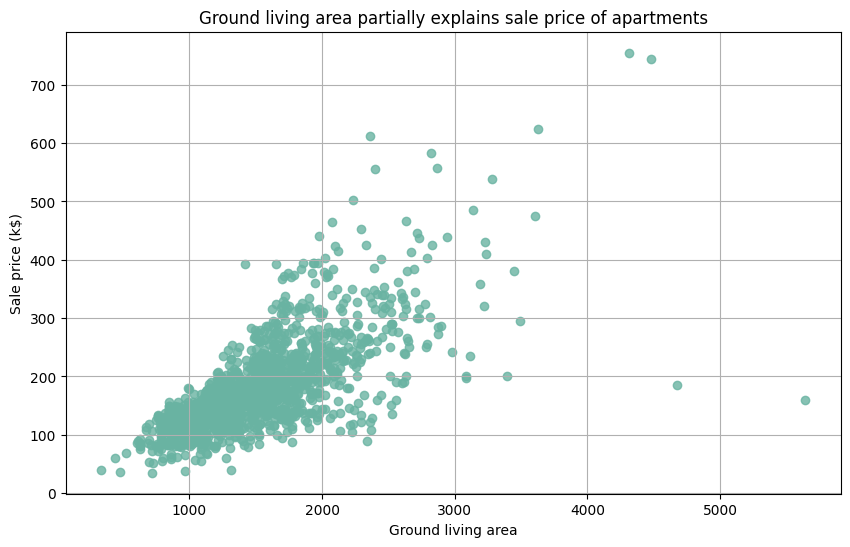

In [13]:
plt.figure(figsize=(10, 6))

plt.scatter(data['GrLivArea'], data['SalePrice'] / 1000, color="#69b3a2", alpha=0.8)
plt.title("Ground living area partially explains sale price of apartments")
plt.xlabel('Ground living area')
plt.ylabel('Sale price (k$)')
plt.grid(True)
plt.show()

[Text(0.5, 1.0, 'Density 2d: raster'),
 Text(0.5, 0, 'Ground living area'),
 Text(0, 0.5, 'Sale price (k$)'),
 (0.0, 2500.0),
 (0.0, 400.0)]

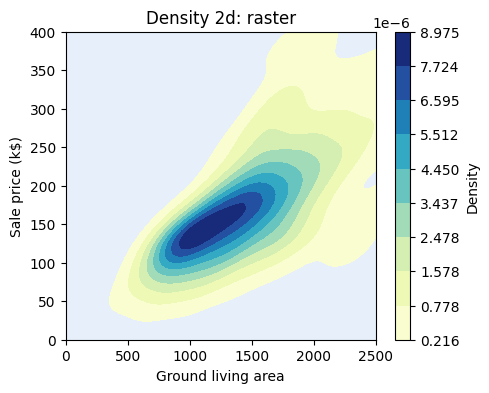

In [14]:
plt.figure(figsize=(5, 4))

p = sns.scatterplot(x='GrLivArea', y=data['SalePrice'] / 1000, data=data, color="#69b3a2", alpha=0.8, s=20)
p.set(title="Dot size", xlabel="Ground living area", ylabel="Sale price (k$)")

p = sns.kdeplot(x='GrLivArea', y=data['SalePrice'] / 1000, data=data, color="#69b3a2", fill=True, alpha=0.8)
p.set(title="Density 2d: contour", xlabel="Ground living area", ylabel="Sale price (k$)")

p = sns.kdeplot(x='GrLivArea', y=data['SalePrice'] / 1000, data=data, fill=True, cmap="Blues", levels=5, thresh=0)
p.set(title="Density 2d: area", xlabel="Ground living area", ylabel="Sale price (k$)")

p = sns.kdeplot(x='GrLivArea', y=data['SalePrice'] / 1000, data=data, cmap="YlGnBu", fill=True, cbar=True, cbar_kws={'label': 'Density'})
p.set(title="Density 2d: raster", xlabel="Ground living area", ylabel="Sale price (k$)", xlim=(0, 2500), ylim=(0, 400))

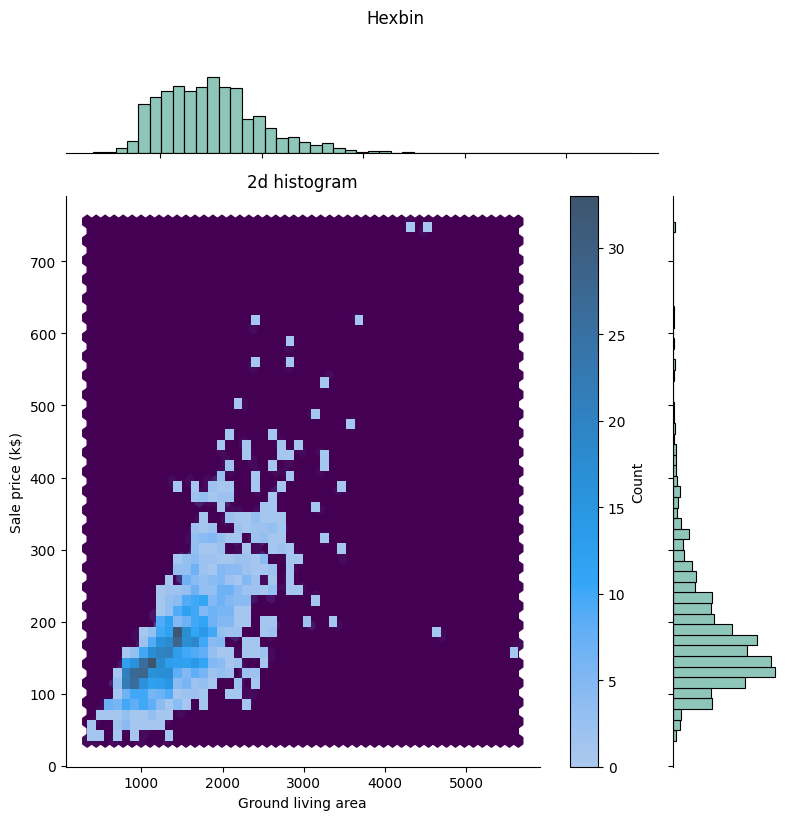

In [15]:
p = sns.jointplot(x='GrLivArea', y=data['SalePrice'] / 1000, data=data, kind='hex', color="#69b3a2", cmap="viridis", height=8)
p.fig.suptitle("Hexbin", y=1.02)

p = sns.histplot(x='GrLivArea', y=data['SalePrice'] / 1000, data=data, bins=50, cbar=True, cbar_kws={'label': 'Count'})
p.set(title="2d histogram", xlabel="Ground living area", ylabel="Sale price (k$)")

plt.tight_layout()
plt.show()

# **3numeric not ordered story**

In [16]:
from gapminder import gapminder
data = gapminder[gapminder['year'] == 2007].drop(columns=['year'])
print(data.head(6).round({'gdpPercap': 0, 'pop': 2, 'lifeExp': 1}))

        country continent  lifeExp       pop  gdpPercap
11  Afghanistan      Asia     43.8  31889923      975.0
23      Albania    Europe     76.4   3600523     5937.0
35      Algeria    Africa     72.3  33333216     6223.0
47       Angola    Africa     42.7  12420476     4797.0
59    Argentina  Americas     75.3  40301927    12779.0
71    Australia   Oceania     81.2  20434176    34435.0


Plotted bubble plots of which one of them is interactive

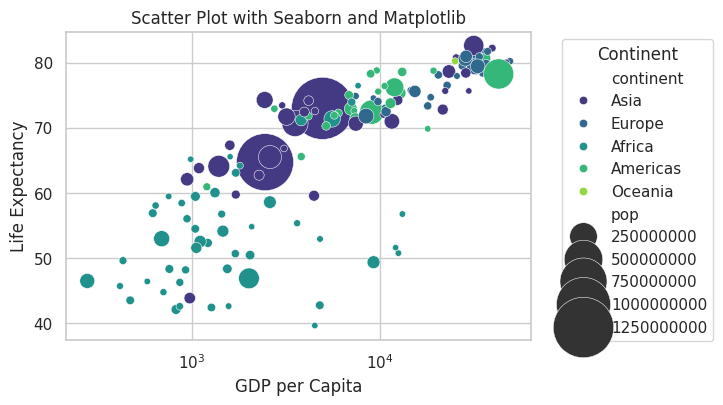

In [17]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=data, x='gdpPercap', y='lifeExp', size='pop', ax=ax, hue='continent', sizes=(20, 2000), palette='viridis')
ax.set(xscale='log', xlabel='GDP per Capita', ylabel='Life Expectancy', title='Scatter Plot with Seaborn and Matplotlib')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

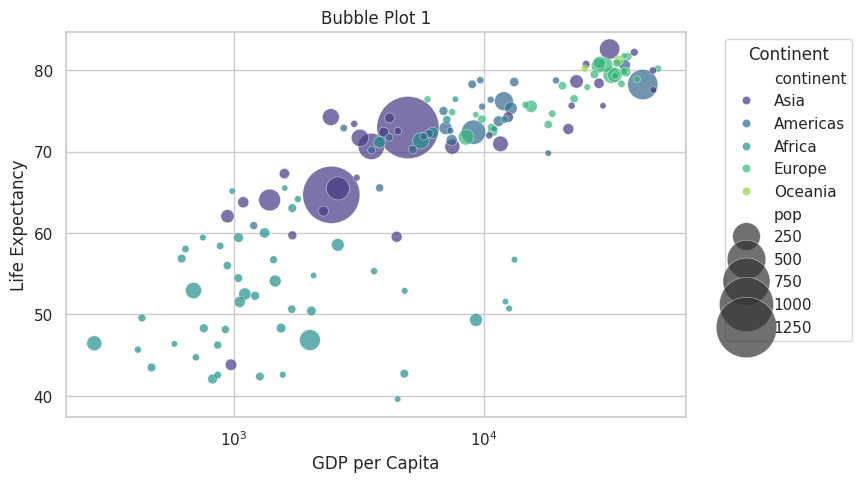

In [18]:
data['pop'] /= 1000000
data = data.sort_values(by='pop', ascending=False)
data['country'] = pd.Categorical(data['country'], data['country'])
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='gdpPercap', y='lifeExp', size='pop', hue='continent', alpha=0.7, sizes=(20, 2000), palette='viridis')
plt.xscale('log')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Bubble Plot 1')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

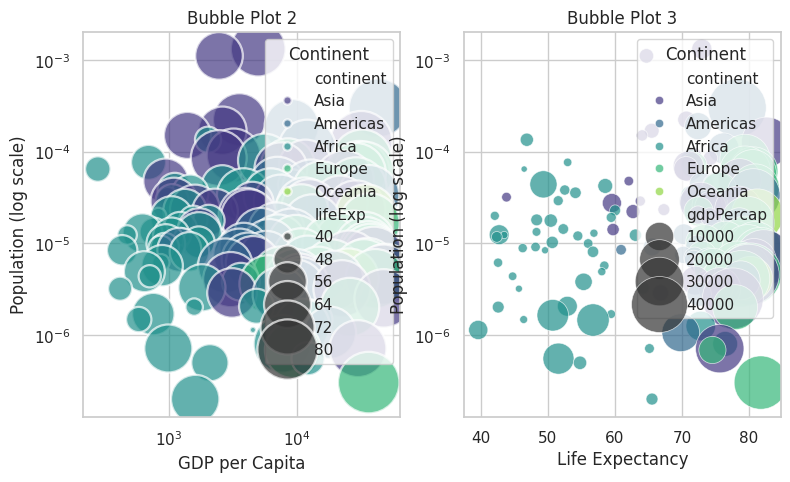

In [19]:
data['pop'] /= 1000000
data = data.sort_values(by='pop', ascending=False)
data['country'] = pd.Categorical(data['country'], data['country'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
sns.scatterplot(data=data, x='gdpPercap', y='pop', size='lifeExp', hue='continent', alpha=0.7, sizes=(20, 2000), palette='viridis', ax=ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('GDP per Capita')
ax1.set_ylabel('Population (log scale)')
ax1.set_title('Bubble Plot 2')
ax1.legend(title='Continent', loc='upper right')

sns.scatterplot(data=data, x='lifeExp', y='pop', size='gdpPercap', hue='continent', alpha=0.7, sizes=(20, 2000), palette='viridis', ax=ax2)
ax2.set_yscale('log')
ax2.set_xlabel('Life Expectancy')
ax2.set_ylabel('Population (log scale)')
ax2.set_title('Bubble Plot 3')
ax2.legend(title='Continent', loc='upper right')

plt.show()

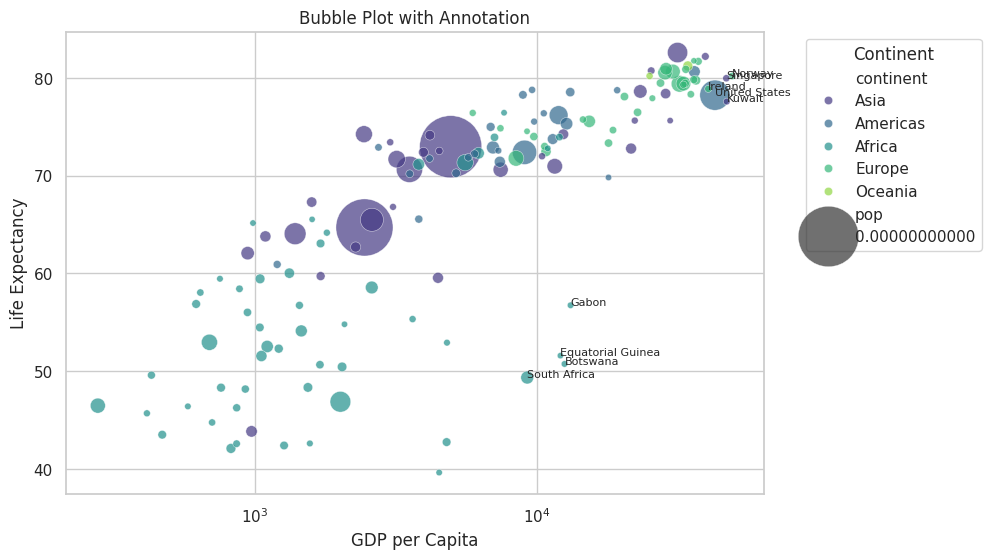

In [20]:
tmp = data.copy()
tmp['pop'] /= 1000000
tmp = tmp.sort_values(by='pop', ascending=False)
tmp['country'] = pd.Categorical(tmp['country'], tmp['country'])
tmp['annotation'] = tmp.apply(lambda row: 'yes' if row['gdpPercap'] > 5000 and row['lifeExp'] < 60 or row['lifeExp'] < 30 or row['gdpPercap'] > 40000 else 'no', axis=1)

plt.figure(figsize=(9, 6))
sns.scatterplot(data=tmp, x='gdpPercap', y='lifeExp', size='pop', hue='continent', alpha=0.7, sizes=(20, 2000), palette='viridis')
plt.xscale('log')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Bubble Plot with Annotation')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

annotated_countries = tmp[tmp['annotation'] == 'yes']
for index, row in annotated_countries.iterrows():
    plt.text(row['gdpPercap'], row['lifeExp'], row['country'], size=8)

plt.show()

In [21]:
data['pop'] /= 1000000
data = data.sort_values(by='pop', ascending=False)
data['country'] = pd.Categorical(data['country'], data['country'])

fig = px.scatter(data, x='gdpPercap', y='lifeExp', size='pop', color='continent', log_x=True, title='Interactive Bubble Plot')
fig.update_layout(showlegend=True)
fig.update_traces(text=data['country'], textposition='top center')
fig.show()

# **more than 3 numeric not ordered story**

In [22]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/6_SeveralNum.csv'
data = pd.read_csv(url, index_col=0)
print(tabulate(data.head(6), headers='keys', tablefmt='pipe'))

|                   |   mpg |   cyl |   disp |   hp |   drat |    wt |   qsec |   vs |   am |   gear |   carb |
|:------------------|------:|------:|-------:|-----:|-------:|------:|-------:|-----:|-----:|-------:|-------:|
| Mazda RX4         |  21   |     6 |    160 |  110 |   3.9  | 2.62  |  16.46 |    0 |    1 |      4 |      4 |
| Mazda RX4 Wag     |  21   |     6 |    160 |  110 |   3.9  | 2.875 |  17.02 |    0 |    1 |      4 |      4 |
| Datsun 710        |  22.8 |     4 |    108 |   93 |   3.85 | 2.32  |  18.61 |    1 |    1 |      4 |      1 |
| Hornet 4 Drive    |  21.4 |     6 |    258 |  110 |   3.08 | 3.215 |  19.44 |    1 |    0 |      3 |      1 |
| Hornet Sportabout |  18.7 |     8 |    360 |  175 |   3.15 | 3.44  |  17.02 |    0 |    0 |      3 |      2 |
| Valiant           |  18.1 |     6 |    225 |  105 |   2.76 | 3.46  |  20.22 |    1 |    0 |      3 |      1 |


In [23]:
numeric_data = data[['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]

Plotted Histograms of the numerical variables, a scatter plot, a dendogram with clustering, an interactive heat map and an interactive PCA scatter plot

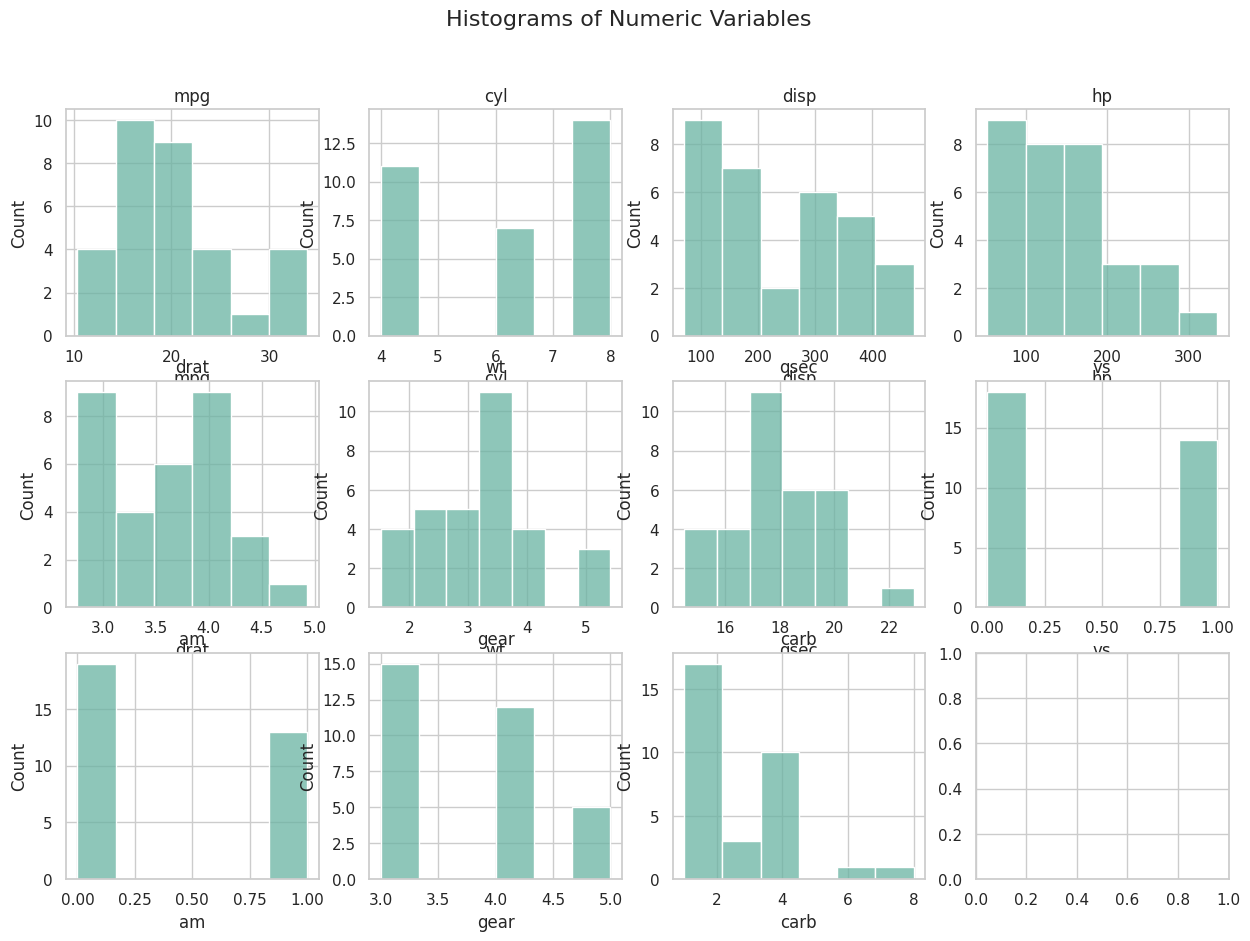

In [24]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Histograms of Numeric Variables', fontsize=16)

for i, (col, ax) in enumerate(zip(numeric_data.columns, axes.flatten())):
    sns.histplot(numeric_data[col], ax=ax, color="#69b3a2")
    ax.set_title(col)

plt.show()

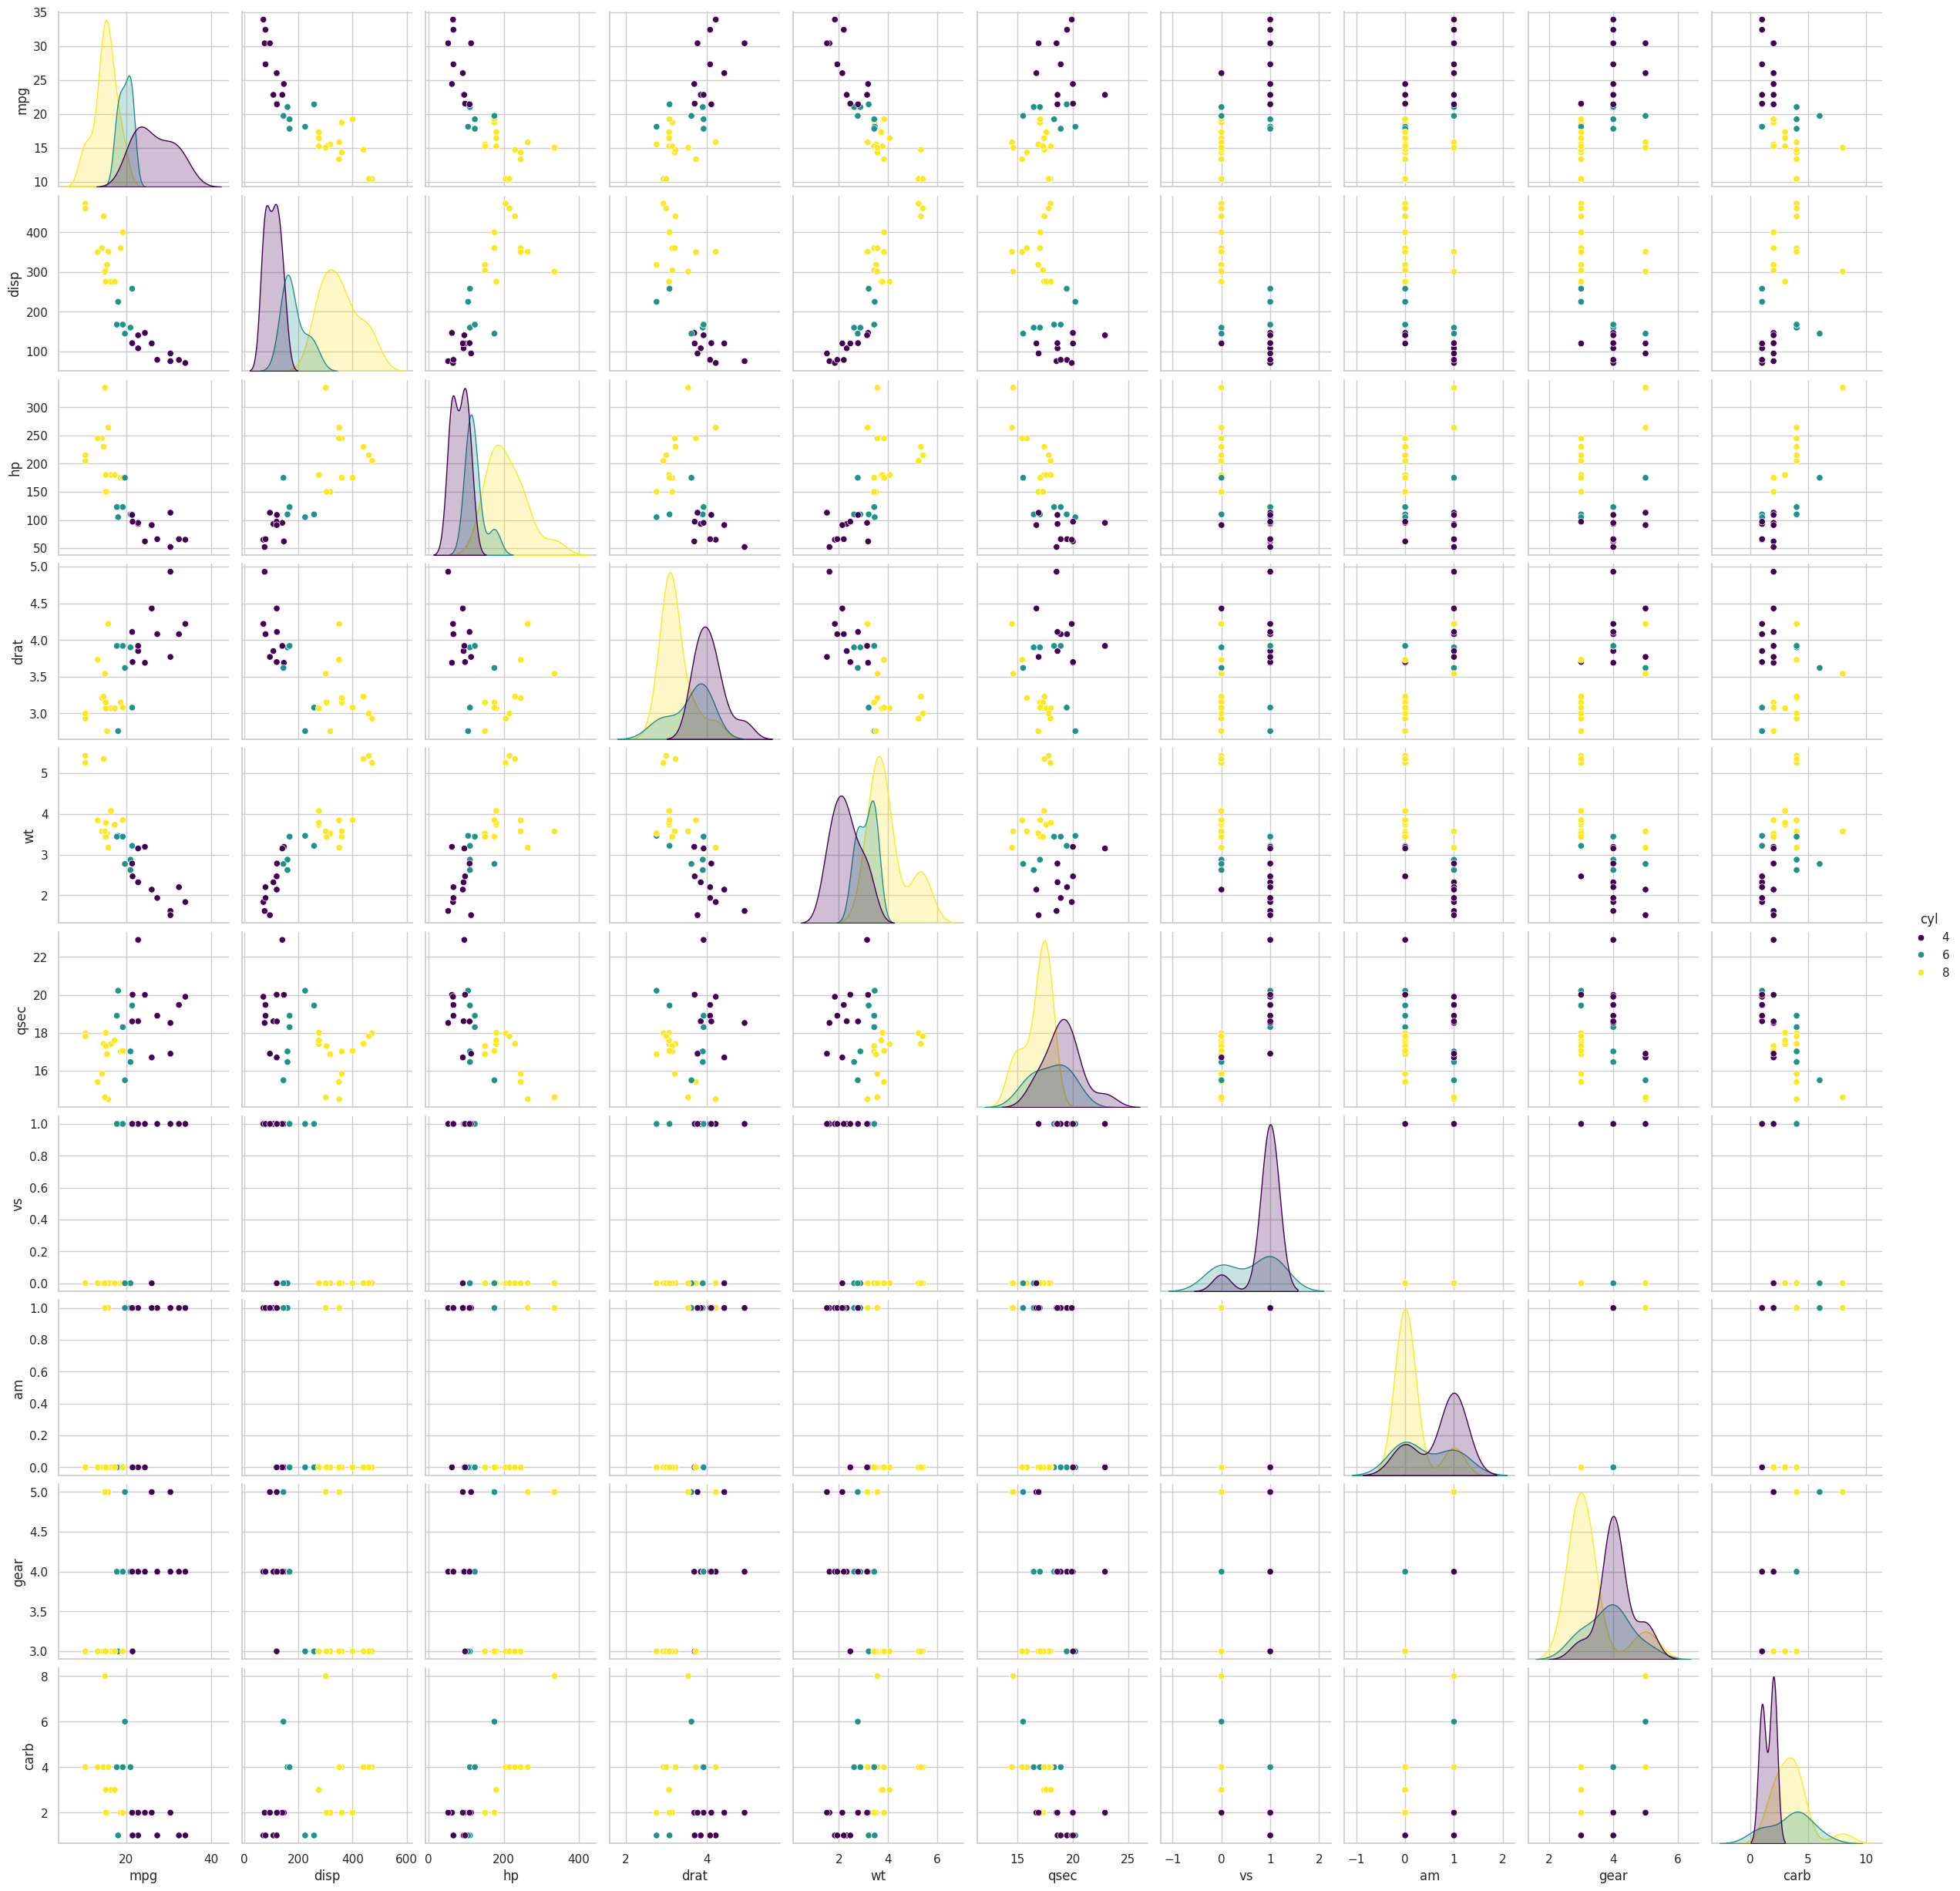

In [25]:
sns.set_theme(style="whitegrid")
sns.pairplot(data, diag_kind="kde", markers='o', hue='cyl', palette="viridis")
plt.show()

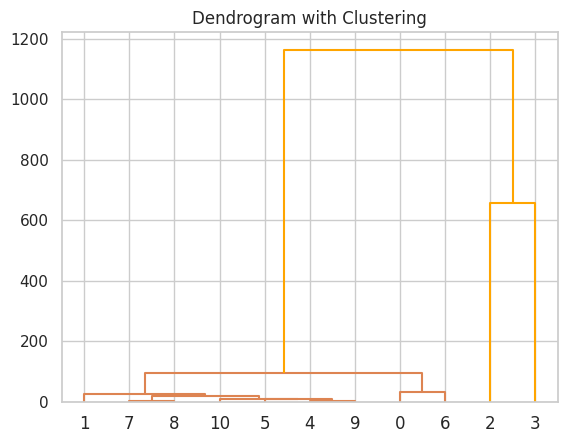

In [26]:
linkage_matrix = linkage(data.transpose(), method='average', metric='euclidean')
dendrogram(linkage_matrix, color_threshold=350, above_threshold_color='orange')
plt.title('Dendrogram with Clustering')
plt.show()

In [27]:
fig = px.imshow(data.T, color_continuous_scale='Viridis')
fig.show()

myPCA = PCA(n_components=2, rescale_with_mean=True, rescale_with_std=True)
result = myPCA.fit_transform(data)

In [28]:
fig = px.scatter(result, x=0, y=1, text=data.index, color_discrete_sequence=["#69b3a2"])
fig.update_traces(textposition='top center')
fig.update_layout(title='PCA Scatter Plot', xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')
fig.show()

# **1categorical variables story**

In [29]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv'
data = pd.read_csv(url)
print(tabulate(data.head(6), headers='keys', tablefmt='html', showindex=False))

<table>
<thead>
<tr><th>Country       </th><th style="text-align: right;">  Value</th></tr>
</thead>
<tbody>
<tr><td>United States </td><td style="text-align: right;">  12394</td></tr>
<tr><td>Russia        </td><td style="text-align: right;">   6148</td></tr>
<tr><td>Germany (FRG) </td><td style="text-align: right;">   1653</td></tr>
<tr><td>France        </td><td style="text-align: right;">   2162</td></tr>
<tr><td>United Kingdom</td><td style="text-align: right;">   1214</td></tr>
<tr><td>China         </td><td style="text-align: right;">   1131</td></tr>
</tbody>
</table>


Plotted a bar plot, circular bar plot

In [30]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=data['Country'], y=data['Value'], marker_color='skyblue'), row=1, col=1)
fig.update_layout(title_text='Bar Plot', xaxis_title='Name', yaxis_title='Value', template='plotly_white')
fig.show()

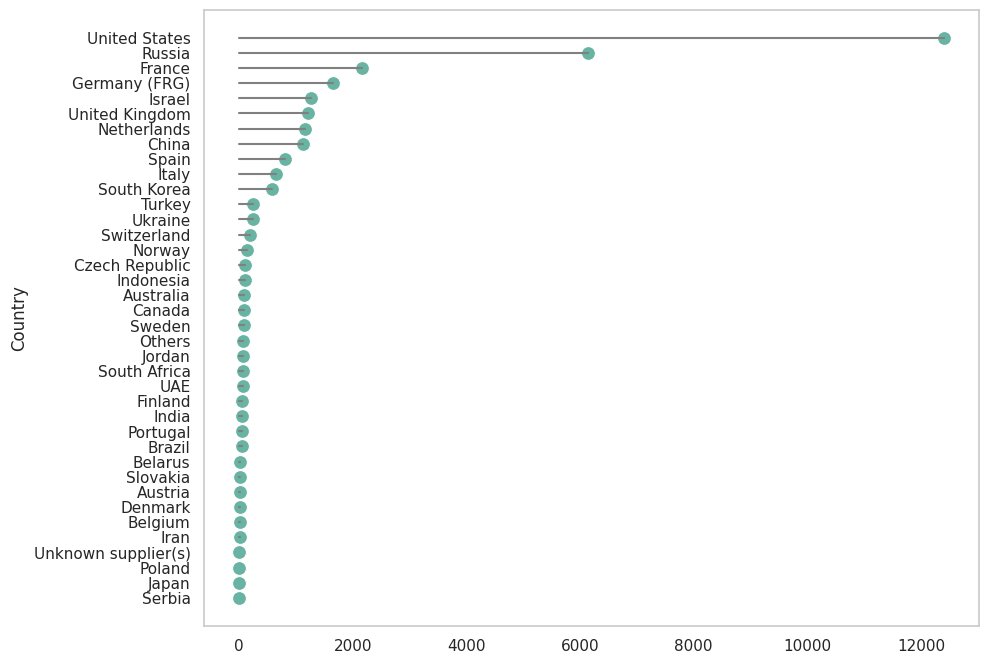

In [31]:
data = data.dropna(subset=['Value'])
data = data.sort_values('Value')
data['Country'] = pd.Categorical(data['Country'], categories=data['Country'].unique())

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

for idx, row in data.iterrows():
    plt.plot([0, row['Value']], [row['Country'], row['Country']], color="grey")

sns.scatterplot(x='Value', y='Country', data=data, s=100, color="#69b3a2")

plt.gca().invert_yaxis()
plt.grid(False)
plt.title('')
plt.xlabel('')
plt.show()

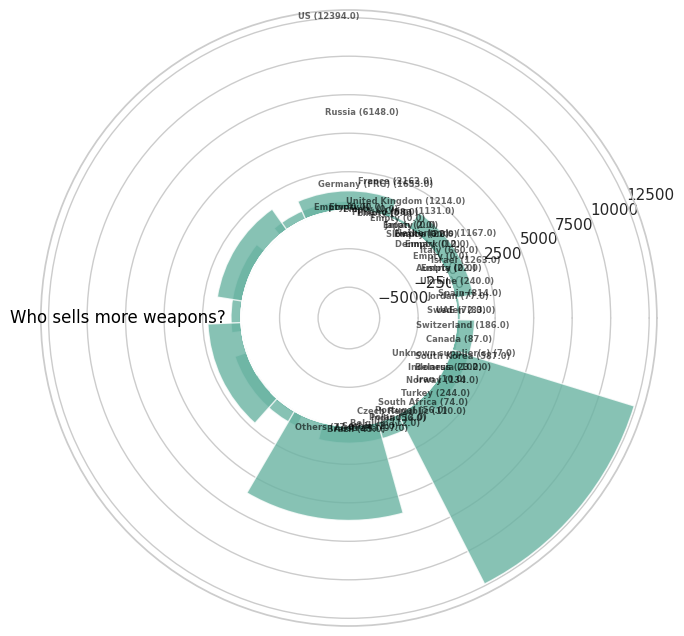

In [32]:
empty_bar = 10

empty_data = pd.DataFrame({'Country': ['Empty'] * empty_bar, 'Value': [0] * empty_bar})
data = pd.concat([data, empty_data])

label_tmp = data.copy()
number_of_bar = len(label_tmp)
angle = 90 - 360 * (label_tmp.index - 0.5) / number_of_bar
label_tmp['hjust'] = np.where(angle < -90, 1, 0)
label_tmp['angle'] = np.where(angle < -90, angle + 180, angle)
label_tmp['Country'] = label_tmp['Country'].astype(str)
label_tmp['Country'] = label_tmp['Country'].replace({"United States": "US"})
label_tmp['Country'] = label_tmp['Country'] + " (" + label_tmp['Value'].astype(str) + ")"

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
bars = ax.bar(np.arange(len(data)), data['Value'], color='#69b3a2', alpha=0.8)

ax.set_ylim(-7000, 13000)
ax.set_xticks([])

for label, angle, value in zip(label_tmp['Country'], np.radians(label_tmp['angle']), label_tmp['Value']):
    ax.text(angle, value + 200, label, color='black', fontweight='bold', alpha=0.6, size=6, ha='center', va='center')

ax.text(np.radians(180), 8000, "Who sells more weapons?", color='black', ha='center', va='center', fontsize=12)

plt.show()

Plotted a tree map

In [33]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv'
data = pd.read_csv(url)

fig = px.treemap(
    data,
    path=['Country'],
    values='Value',
    title='',
    color_discrete_sequence=px.colors.qualitative.Dark2,
    hover_data=['Value']
)

fig.show()

Plotting a sunburst plot

In [34]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv'
data = pd.read_csv(url)

tmp = data.dropna(subset=['Value'])

edges = pd.DataFrame({
    'from': ['o'] * len(tmp['Country']),
    'to': tmp['Country']
})

vertices = pd.concat([tmp, pd.DataFrame({'Country': ['o'], 'Value': [1]})], ignore_index=True)
vertices['name'] = vertices['Country']

fig = px.sunburst(
    edges,
    names='to',
    parents='from',
    values=tmp['Value'],
    title='',
    color=tmp['Country'],
    color_discrete_sequence=px.colors.sequential.Viridis,
)

fig.show()

Plotted a directed graph

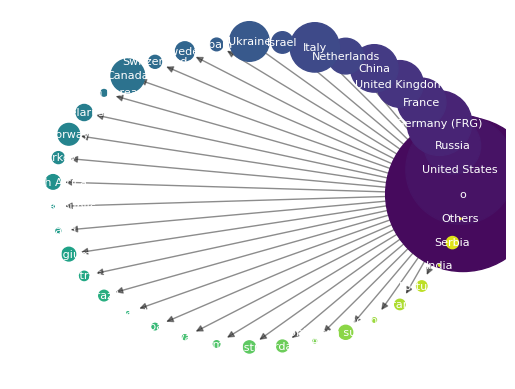

In [35]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv'
data = pd.read_csv(url)
tmp = data.dropna(subset=['Value'])

edges = pd.DataFrame({
    'from': ['o'] * len(tmp['Country']),
    'to': tmp['Country']
})

vertices = pd.concat([tmp, pd.DataFrame({'Country': ['o'], 'Value': [1]})], ignore_index=True)
vertices['name'] = vertices['Country']

G = nx.from_pandas_edgelist(edges, 'from', 'to', create_using=nx.DiGraph())

pos = nx.layout.circular_layout(G)

sizes = [v['Value'] for _, v in vertices.iterrows()]
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=sns.color_palette("viridis", n_colors=len(vertices)))
nx.draw_networkx_edges(G, pos, alpha=0.5)

labels = {v['Country']: v['Country'] for _, v in vertices.iterrows()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='white')

plt.axis('off')
plt.show()

# **2 or more categorical variables - two independent lists - story**

Displaying the english words generated

In [36]:
url = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/14_SeveralIndepLists.csv"
response = requests.get(url)

data = pd.read_csv(StringIO(response.text), delimiter=' ', quotechar='"', quoting=csv.QUOTE_MINIMAL)

def remove_patterns(text, patterns):
    for pattern in patterns:
        text = text.str.replace(pattern, "", regex=True)
    return text

to_remove = ["_|[0-9]|\\.", "function|^id|script|var|div|null|typeof|opts|if|^r$|undefined|false|loaded|true|settimeout|eval|else|artist"]
data['word'] = remove_patterns(data['word'], to_remove)

data = data[~data['word'].isin(ENGLISH_STOP_WORDS)]

a = data[data['artist'] == 'booba']['word'].sample(n=6, random_state=42).reset_index(drop=True).rename('booba')
b = data[data['artist'] == 'nekfeu']['word'].sample(n=6, random_state=42).reset_index(drop=True).rename('nekfeu')
c = data[data['artist'] == 'georges-brassens']['word'].sample(n=6, random_state=42).reset_index(drop=True).rename('brassens')

print(a)
print(b)
print(c)

0    faire
1     dire
2    qu'un
3         
4         
5         
Name: booba, dtype: object
0          va
1     cheveux
2    problème
3        know
4       comme
5      graine
Name: nekfeu, dtype: object
0    reloadfromp
1       complete
2          tabou
3        showads
4           trop
5               
Name: brassens, dtype: object


Plotting a word cloud

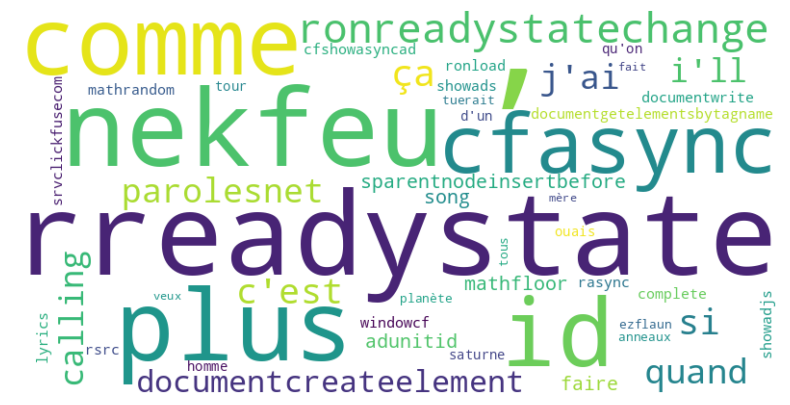

In [37]:
# Filter data for the specific artist (nekfeu)
nekfeu_words = data[data['artist'] == 'nekfeu']['word']

word_frequencies = nekfeu_words.value_counts().reset_index()
word_frequencies.columns = ['word', 'freq']

top_words = word_frequencies.head(50)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words.set_index('word')['freq'])

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Plotting the lollipop chart for top 10 most frequently occured words

<ipython-input-38-1d95cb22679e>:4: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



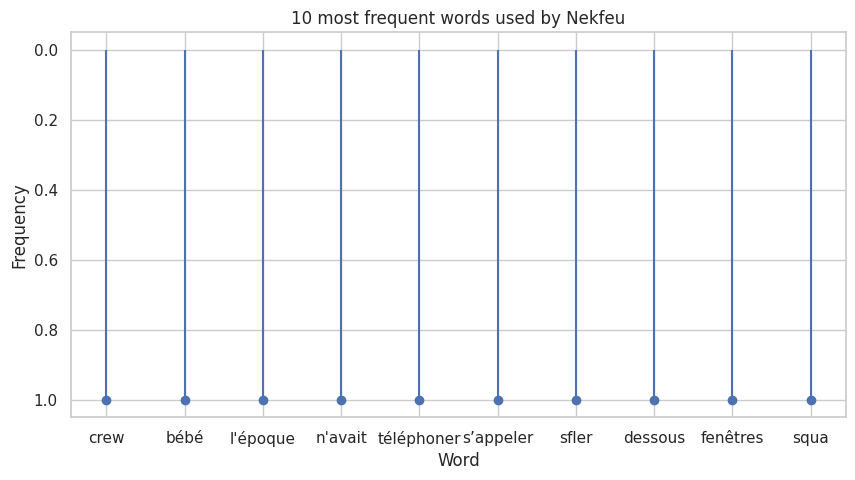

In [38]:
top_words = word_frequencies.tail(10)

plt.figure(figsize=(10, 5))
plt.stem(top_words['word'], top_words['freq'], basefmt=" ", markerfmt="o", linefmt="-", use_line_collection=True)
plt.gca().invert_yaxis()
plt.title("10 most frequent words used by Nekfeu")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


Plotting venn diagrams

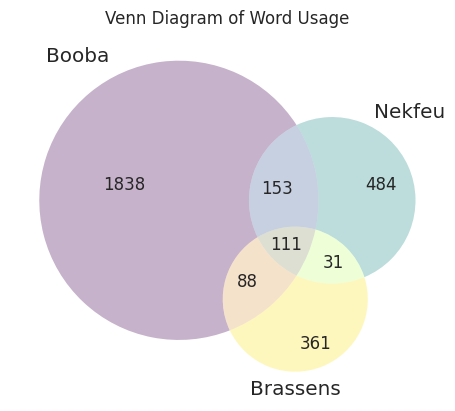

In [39]:
booba_words = set(data[data['artist'] == 'booba']['word'])
nekfeu_words = set(data[data['artist'] == 'nekfeu']['word'])
brassens_words = set(data[data['artist'] == 'georges-brassens']['word'])

venn_labels = {'100': booba_words - nekfeu_words - brassens_words,
               '010': nekfeu_words - booba_words - brassens_words,
               '110': booba_words & nekfeu_words - brassens_words,
               '001': brassens_words - booba_words - nekfeu_words,
               '101': booba_words & brassens_words - nekfeu_words,
               '011': nekfeu_words & brassens_words - booba_words,
               '111': booba_words & nekfeu_words & brassens_words}

venn3(subsets=(len(venn_labels['100']), len(venn_labels['010']), len(venn_labels['110']),
               len(venn_labels['001']), len(venn_labels['101']), len(venn_labels['011']),
               len(venn_labels['111'])),
      set_labels=('Booba', 'Nekfeu', 'Brassens'),
      set_colors=('#440154ff', '#21908dff', '#fde725ff'),
      alpha=0.3)

plt.title("Venn Diagram of Word Usage")
plt.show()

# **2 or more categorical variables - nested - story**

In [40]:
url = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/11_SevCatOneNumNestedOneObsPerGroup.csv"
data = pd.read_csv(url, sep=";")

data['value'] = data['value'].replace(-1, 1)
data.columns = ["Continent", "Region", "Country", "Pop"]

display(HTML(data.head(3).to_html(classes="table table-striped")))

,Continent,Region,Country,Pop
0,Asia,Southern Asia,Afghanistan,25500100
1,Europe,Northern Europe,Åland Islands,28502
2,Europe,Southern Europe,Albania,2821977


Plotted a tree map

In [41]:
data = data.dropna()

fig = px.treemap(data,
                 path=["Continent", "Region", "Country"],
                 values="Pop",
                 color="Country",
                 title="",
                 color_discrete_sequence=px.colors.qualitative.Dark2,
                 )

fig.update_traces(marker_line=dict(width=[1, 0.5, 0.1], color=['black', 'grey', 'grey']),
                  textfont_size=14,
                  textfont_color=['white', 'white', 'black'],
                  textfont=dict(family='Arial', size=14, color='white'),
                  hoverinfo="label+value+percent parent")

fig.show()

In [42]:
data = pd.DataFrame({
    'Continent': ['Europe', 'Europe', 'Asia', 'Asia', 'Africa', 'Africa'],
    'Region': ['Western Europe', 'Eastern Europe', 'Southern Asia', 'Eastern Asia', 'Northern Africa', 'Southern Africa'],
    'Country': ['France', 'Poland', 'India', 'China', 'Morocco', 'South Africa'],
    'Pop': [67000000, 38000000, 1393409038, 1444216107, 36471769, 58558270]
})

data['pathString'] = 'world/' + data['Continent'] + '/' + data['Region'] + '/' + data['Country']

root = Node("world")
for _, row in data.iterrows():
    path_parts = row['pathString'].split('/')
    current_node = root
    for part in path_parts[1:]:
        matching_child = next((child for child in current_node.children if child.name == part), None)
        if matching_child is None:
            current_node = Node(part, parent=current_node, Pop=row['Pop'])
        else:
            current_node = matching_child

node_names = []
parent_node_indices = []
values = []

for pre, fill, node in RenderTree(root):
    node_names.append(node.name)
    parent_node_indices.append(node.parent.name if node.parent else "")
    values.append(node.Pop if hasattr(node, 'Pop') else 0)

plot_data = pd.DataFrame({
    'node_names': node_names,
    'parent': parent_node_indices,
    'values': values
})

fig = px.sunburst(plot_data, names='node_names', parents='parent', values='values', title='Population Circle Packing')
fig.show()

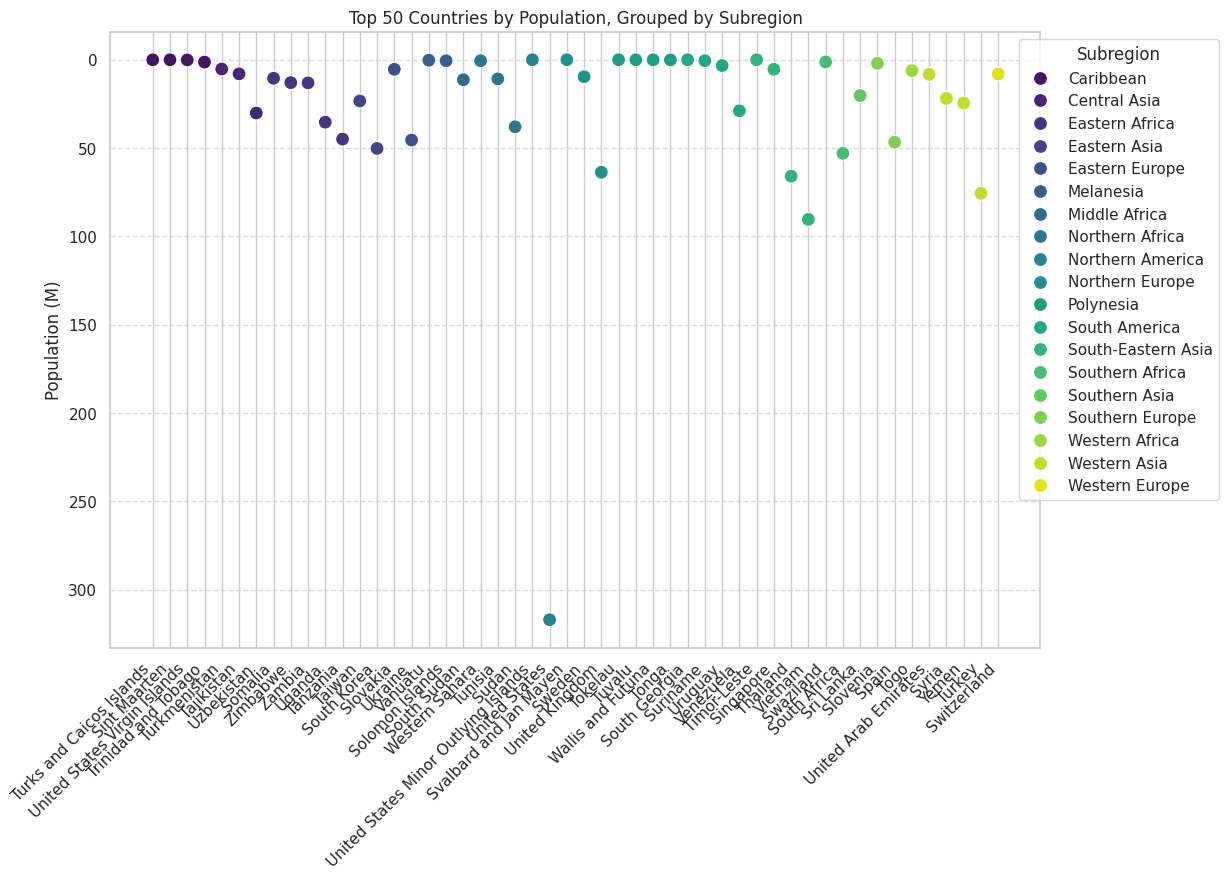

In [43]:
url = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/11_SevCatOneNumNestedOneObsPerGroup.csv"
data = pd.read_csv(url, sep=';')

data = data.dropna(subset=['value'])
data_tail = data.tail(50)
data_tail = data_tail.sort_values(by=['subregion', 'value'])
data_tail['key'] = pd.Categorical(data_tail['key'], data_tail['key'])
data_tail['value'] = data_tail['value'].astype(float) / 1000000

plt.figure(figsize=(12, 8))
sns.scatterplot(x=data_tail['key'], y=data_tail['value'], hue=data_tail['subregion'], palette='viridis', s=100)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Population (M)')
plt.title('Top 50 Countries by Population, Grouped by Subregion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subregion', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# **one num, one cat - one observation per group**

In [44]:
url = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv"
data = pd.read_csv(url)
html_table = tabulate(data.head(6), headers='keys', tablefmt='html', showindex=False)

from IPython.display import HTML
HTML(html_table)

Country,Value
United States,12394
Russia,6148
Germany (FRG),1653
France,2162
United Kingdom,1214
China,1131


In [45]:
filtered_data = data.dropna(subset=['Value'])
sorted_data = filtered_data.sort_values(by='Value')
sorted_data['Country'] = pd.Categorical(sorted_data['Country'], categories=sorted_data['Country'].unique(), ordered=True)

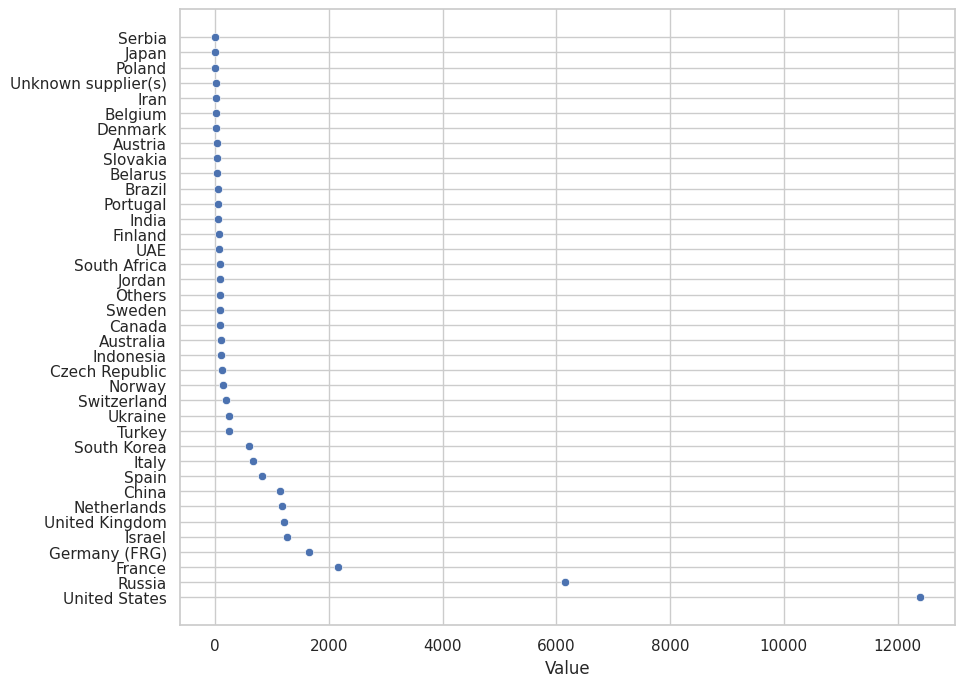

In [46]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=sorted_data, x='Value', y='Country', marker="o")

plt.ylabel('')
plt.title('')

plt.show()

<ipython-input-47-5ae7ac3b1fe5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




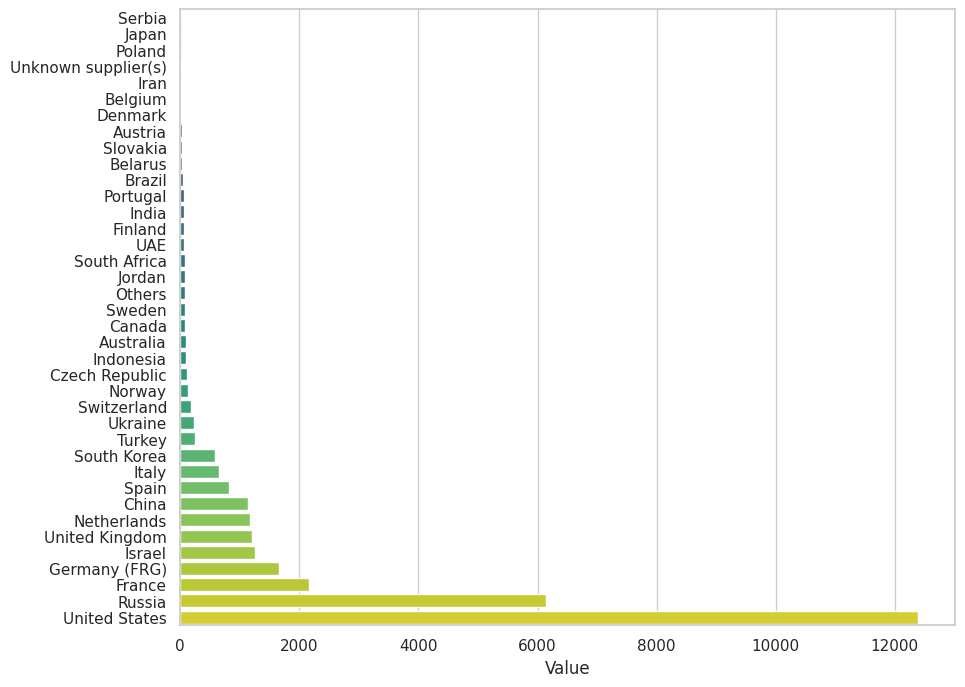

In [47]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.barplot(data=sorted_data, x='Value', y='Country', palette="viridis")

plt.ylabel('')
plt.title('')
plt.show()

In [48]:
fig = px.treemap(data,
                 path=['Country'],
                 values='Value',
                 title='',
                 color_discrete_sequence=px.colors.qualitative.Dark2,
                 color='Country',
                 labels={'Value': 'Size'},
                 template='plotly_dark',
                 )

fig.update_layout(
    margin=dict(t=40, l=0, r=0, b=0),
    font=dict(size=12, color='white'),
)

fig.show()

# **one num, one cat - several observations per group**

In [49]:
url = "https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv"
data = pd.read_csv(url)
data = data.melt(var_name="text", value_name="value")

data["text"] = data["text"].str.replace(".", " ")
data["value"] = data["value"].round(0).astype(int)

print(tabulate(data.sample(8), headers="keys", showindex=False, tablefmt="html", numalign="center"))

<table>
<thead>
<tr><th>text            </th><th style="text-align: center;"> value </th></tr>
</thead>
<tbody>
<tr><td>Probably Not    </td><td style="text-align: center;">  40   </td></tr>
<tr><td>Almost No Chance</td><td style="text-align: center;">   1   </td></tr>
<tr><td>About Even      </td><td style="text-align: center;">  50   </td></tr>
<tr><td>Highly Unlikely </td><td style="text-align: center;">  15   </td></tr>
<tr><td>Likely          </td><td style="text-align: center;">  75   </td></tr>
<tr><td>Improbable      </td><td style="text-align: center;">  35   </td></tr>
<tr><td>Unlikely        </td><td style="text-align: center;">  20   </td></tr>
<tr><td>Highly Likely   </td><td style="text-align: center;">  80   </td></tr>
</tbody>
</table>


In [50]:
data['text'] = pd.Categorical(data['text'], categories=data.groupby('text')['value'].median().sort_values().index, ordered=True)

Plotted strip plot, violin plot, ridge line plot

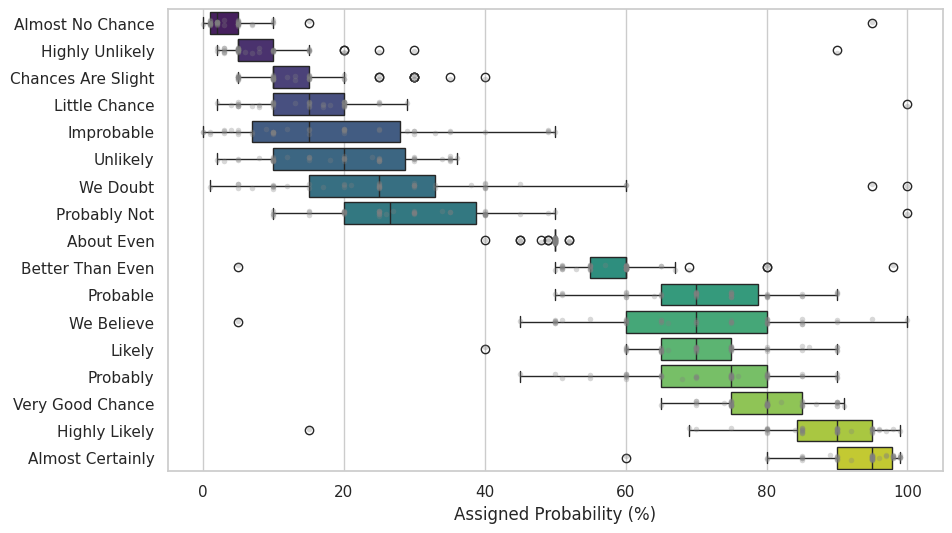

In [51]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.boxplot(data=data, x='value', y='text', hue='text', palette='viridis')
sns.stripplot(data=data, x='value', y='text', color='grey', alpha=0.3, size=4)

plt.xlabel('Assigned Probability (%)')
plt.ylabel('')
plt.legend().remove()

plt.show()

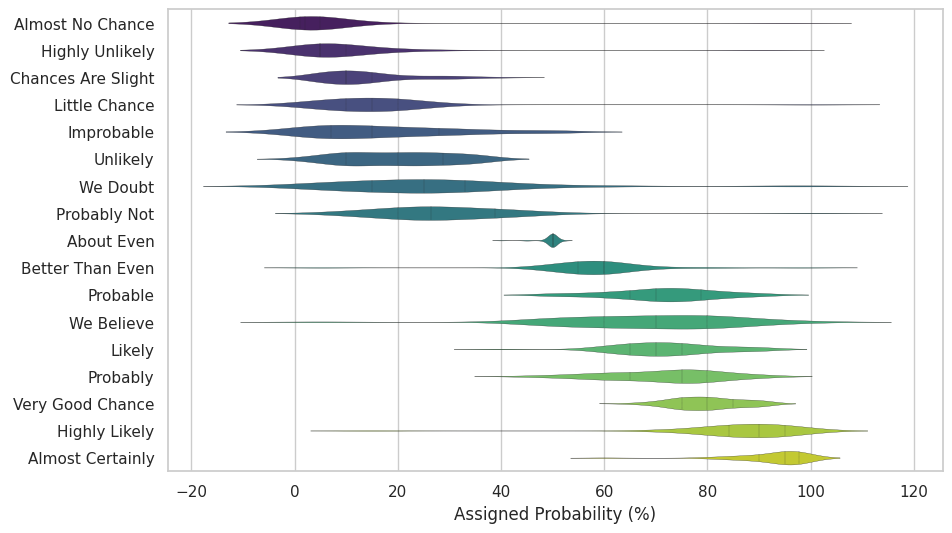

In [52]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.violinplot(data=data, y='text', x='value', hue='text', palette='viridis', width=0.5, inner='quartile', linewidth=0.2)

plt.xlabel('Assigned Probability (%)')
plt.ylabel('')
plt.legend().remove()

plt.show()

<Figure size 1000x800 with 0 Axes>

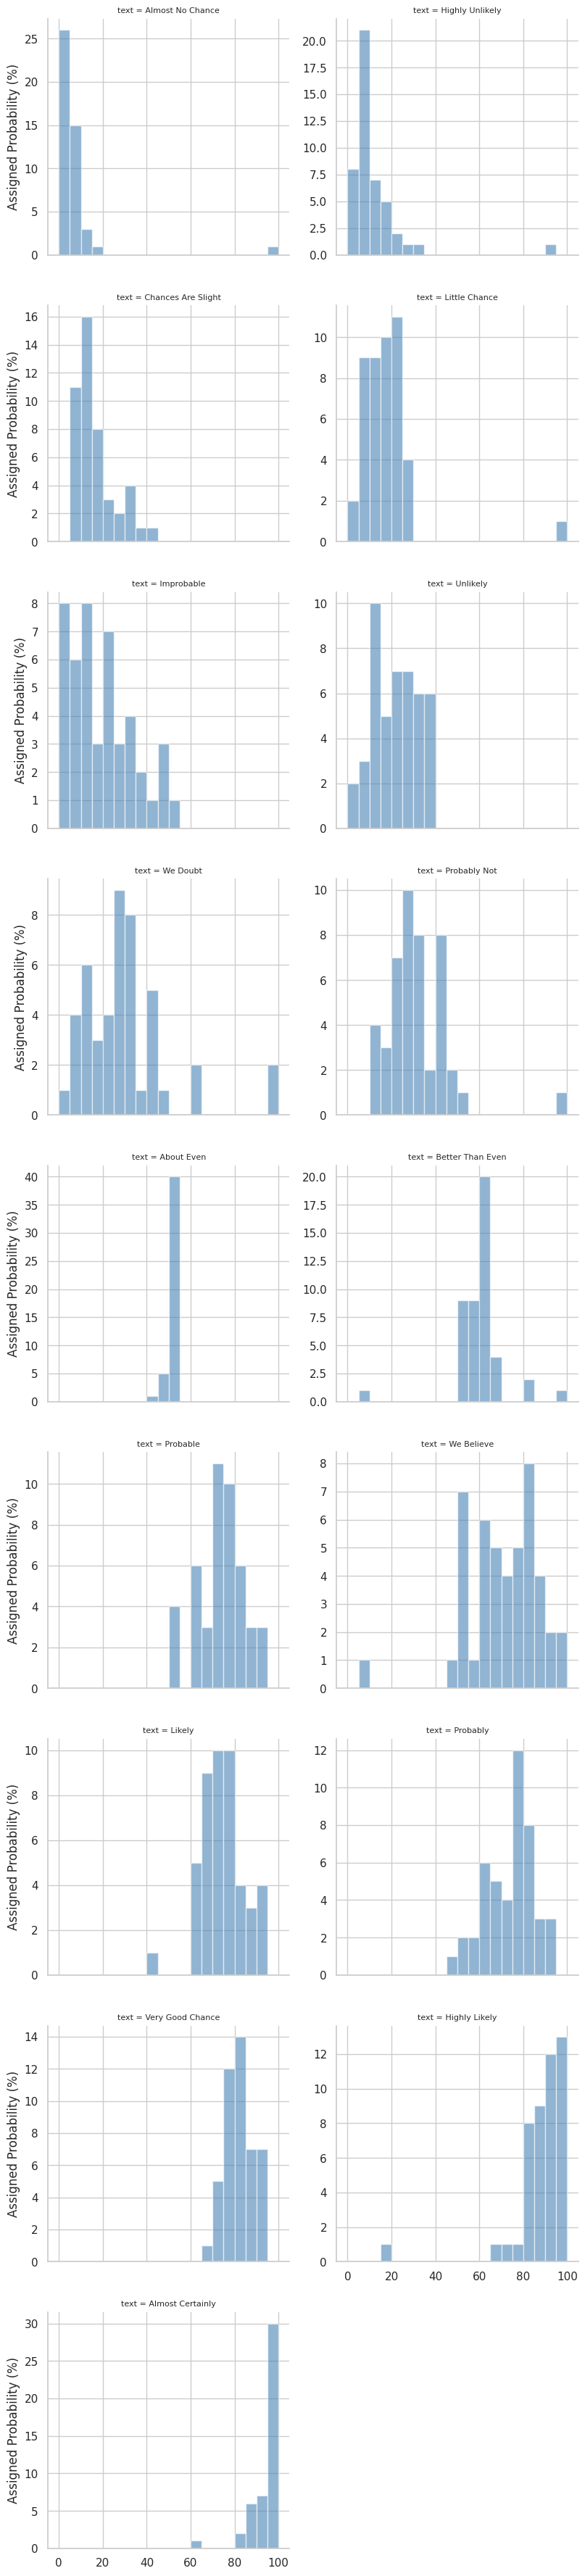

In [53]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

g = sns.FacetGrid(data, col='text', col_wrap=2, height=4, sharey=False)
g.map(plt.hist, 'value', bins=range(0, 101, 5), color='steelblue', alpha=0.6)

g.set_axis_labels('', 'Assigned Probability (%)')
g.set_titles(size=8)

plt.show()

<Figure size 1000x600 with 0 Axes>

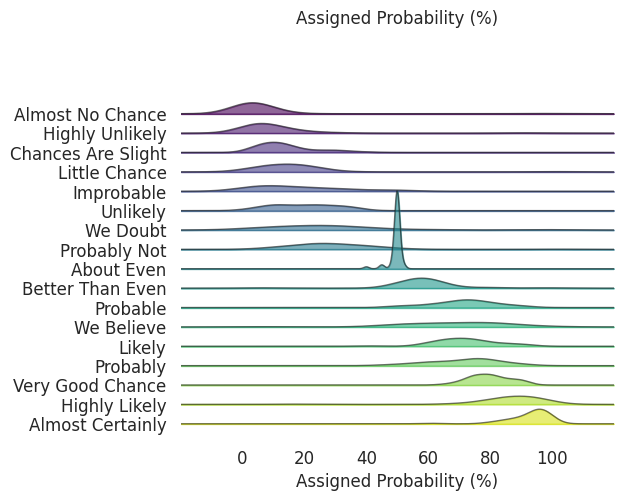

In [54]:
plt.figure(figsize=(10, 6))
joyplot(data, by='text', column='value', colormap=cm.viridis, alpha=0.6, linewidth=1)

plt.xlabel('Assigned Probability (%)')
plt.ylabel('')
plt.title('Assigned Probability (%)')

plt.show()